# Onderzoeksvraag 3

In hoeverre is het mogelijk om logische clusters van consumenten (bijv. AMT_INCOME_TOTAL, DAYS_EMPLOYED, CNT_FAM_MEMBERS) en hun leningen te vinden (bijv. AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE)? Denk aan consumenten met (te)veel, weinig of geen leningen.

Daarvoor moeten wij een diepere duik in de data doen en een goed model te kiezen

### Diepere duik in de data

Voordat we daadwerkelijk beginnen. Bekijken we eerst naar de Datadictionary. Waar we enige intressante Features uit kunnen pakken. Waar van we denken dat die wel intressant kunnen zijn.

### In de volgende Features zijn we geintreseerd.
1. AMT_CREDIT = Dit is de hoeveelheid dat de client als lening heeft gekregen
2. AMT_GOODS_PRICE = Dit is de hoeveelheid dat word uitgeleend voor het product/investering van de client.
3. AMT_ANNUITY = Dit is hoeveel er maandelijks in termijnen terug betaalt moet worden door de klant.
4. AMT_INCOME_TOTAL = Het income van de client wat er maandelijks wordt verdient
5. NAME_CONTRACT_TYPE =  Geeft aan of het contract Cash is of Maandelijkse afschrift.
6. FLAG_OWN_REALTY = Geeft aan of een client een huis/flat bezit (In verband met minder/meer lenen)
7. FLAG_OWN_CAR = Geeft aan of iemand eigenaar is van een eigen auto.
8. CODE_GENDER = Geeft het gender aan van de client. (intressant om te kijken of daar een verschil inzit.)
9. DAYS_BIRTH = Hoeveel Dagen de client is waneer die op de dag van aanmelding
10. NAME_EDUCATION_TYPE = wat het hoogste behaalde  school niveau is van de client

### Nu kunnen we met een voor bedacht plan kijken of de boven genoemde features ook echt zo intressant zijn.

##### Eerst importeren we de nodige libarys

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from scipy.spatial import Voronoi, voronoi_plot_2d
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Vervolgens importeren we de data en gaan we kijken wat er in zit.

In [16]:
app_data = pd.read_csv("src/application_data.csv",sep=",", encoding='cp1252', index_col=0)
app_data.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Hier maken we een overzicht van de Centrummaten en Spreidings maten

De describe() functie van pandas geeft ons een mooi overzicht.

In [17]:
app_data.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


Als we Boven in de 2 tabbelen kijken zien we dat we best wel wat features hebben om mee te spelen. 

###### Dus is het dan belanrijk om te kijken welke het meeste invloed op elkaar hebben. Dit doen we hier onder.

### Data Cleaning / Transforming
Voordat we een colleratie matrix Kunnen maken is het belangrijk om Bepaalde features te transformen, En op te schonenen aangezine deze daar in niet gebruikt kunnen worden. Dit word vooral gedaan om er mee te spelen. Dit heeft mischien we helemaal geen correlatie

#### Transforming

Alle strings worden met een int vervangen om op die manier categorieën toch te gebruiken in ons correlatie matrix

In [5]:
# use sklearn's preprocessing labelencoder to transform the NAME_EDUCTION_TYPE label to corresponding ints
encoder = LabelEncoder()
# Education type
app_data['NAME_EDUCATION_TYPE'] = encoder.fit_transform(app_data['NAME_EDUCATION_TYPE'])
# Gender 
app_data['CODE_GENDER'] = encoder.fit_transform(app_data['CODE_GENDER'])
# property rights
app_data['FLAG_OWN_REALTY'] = encoder.fit_transform(app_data['FLAG_OWN_REALTY'])
# Types of contracts
app_data['NAME_CONTRACT_TYPE'] = encoder.fit_transform(app_data['NAME_CONTRACT_TYPE'])
# NAME_HOUSING_TYPE
app_data['NAME_HOUSING_TYPE'] = encoder.fit_transform(app_data['NAME_HOUSING_TYPE'])
# Has own car flag
app_data['FLAG_OWN_CAR'] = encoder.fit_transform(app_data['FLAG_OWN_CAR'])
# Contract type.
app_data['NAME_CONTRACT_TYPE'] = encoder.fit_transform(app_data['NAME_CONTRACT_TYPE'])

#### Data Cleaning

Hier voor moeten Wat meer dingen gedaan worden. We Moeten kijken naar missende waardes en bepalen of we die er uit willen halen of willen aanvullen waar mogelijk.

De Eerst stap die we nemen is hoevaak de nan in onze dataset verstopt zit.

# GA IK MORGEN MEE VERDER.

In [6]:
nan_count_per_column = app_data.isna().sum()
columns_with_nan = nan_count_per_column[nan_count_per_column > 0].index
print(columns_with_nan)


# nan_percentage_per_column = (app_data.isna().sum() / len(app_data)) * 100
# print(nan_percentage_per_column)

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMI

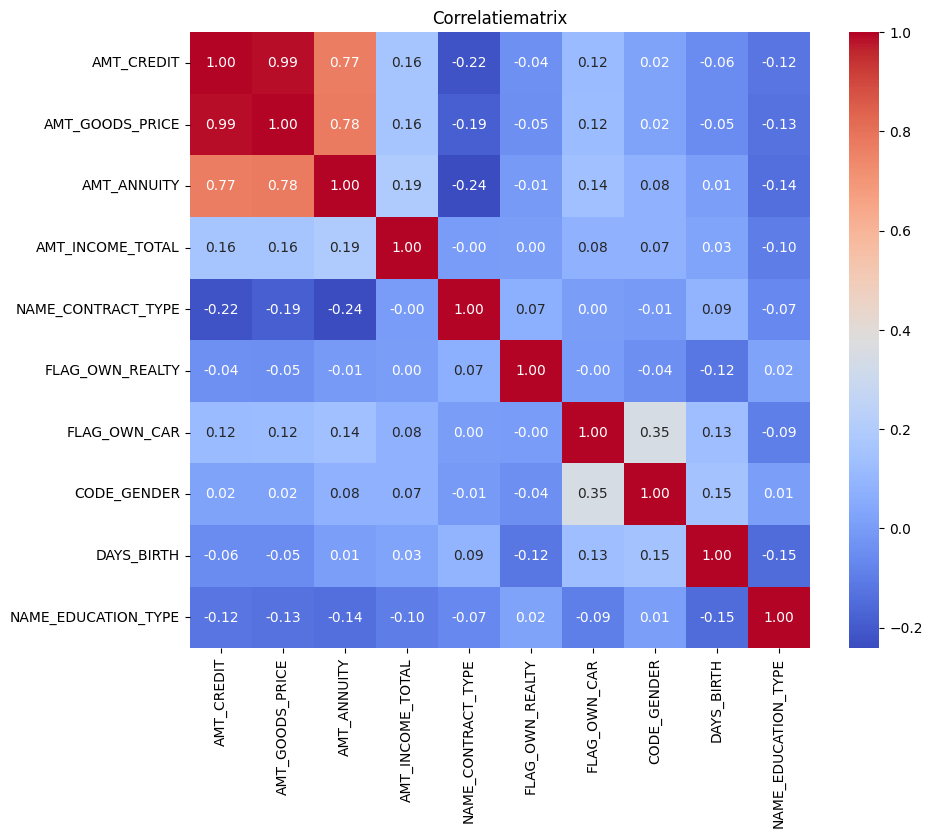

In [107]:
correlation_matrix = app_data[['AMT_CREDIT','AMT_GOODS_PRICE','AMT_ANNUITY','AMT_INCOME_TOTAL','NAME_CONTRACT_TYPE','FLAG_OWN_REALTY','FLAG_OWN_CAR','CODE_GENDER','DAYS_BIRTH','NAME_EDUCATION_TYPE']].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlatiematrix')
plt.show()

### Pairplots voor visualisatie

We maken van de intresante features uit de correlatie matrix pairplots om te kijken hoe dat er eigenlijk uit ziet.

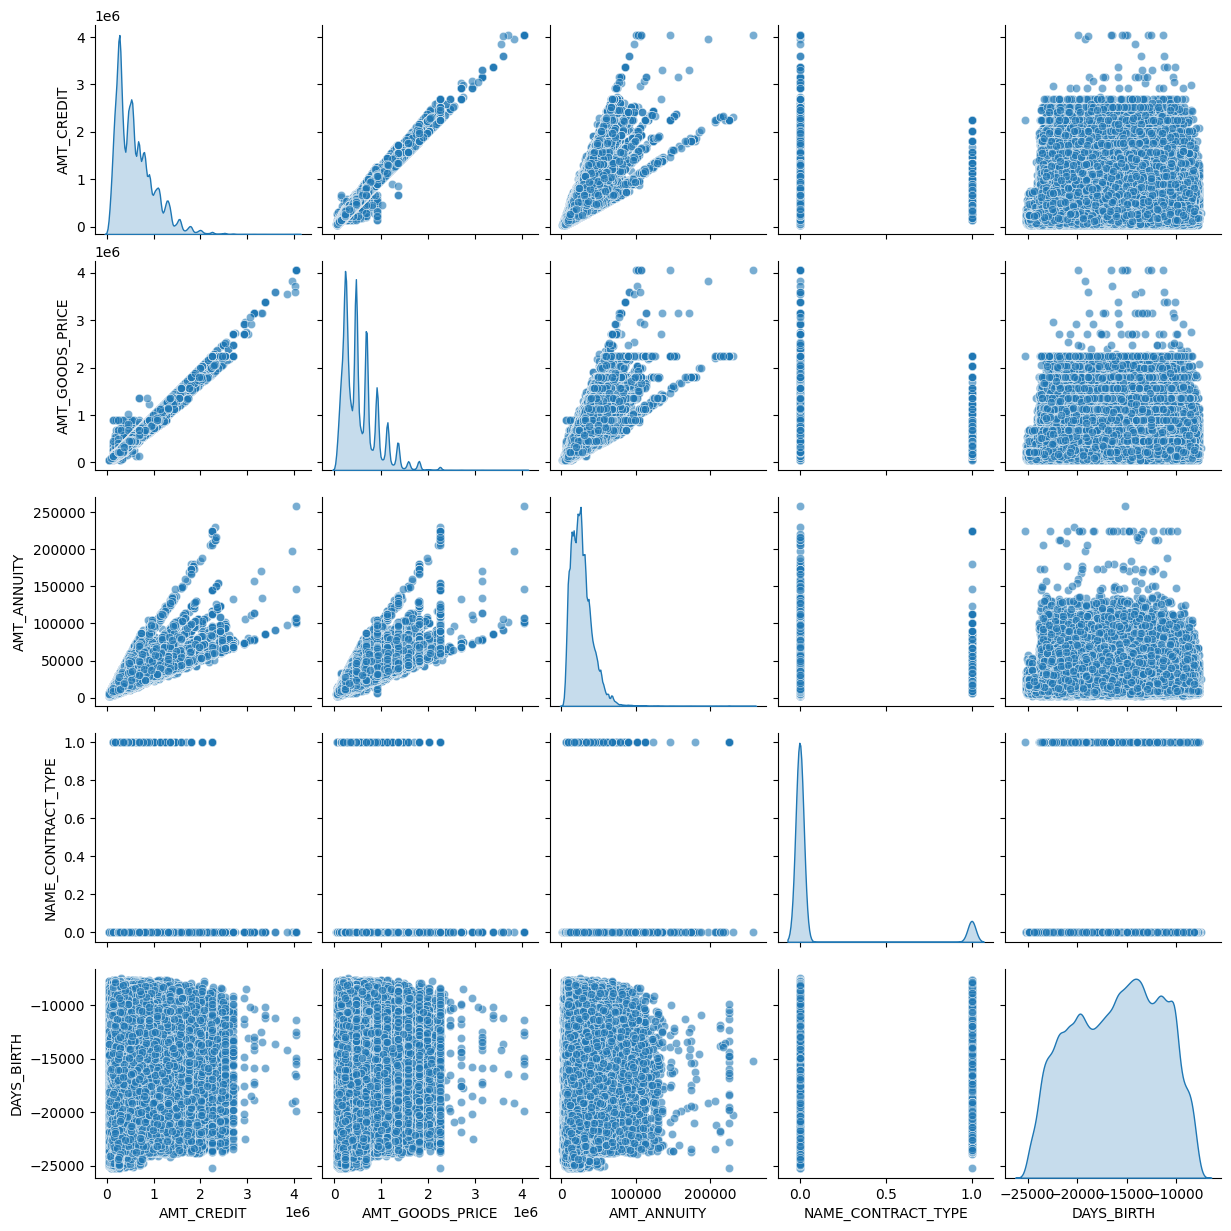

In [109]:
data_pairplot = app_data[['AMT_CREDIT','AMT_GOODS_PRICE','AMT_ANNUITY','NAME_CONTRACT_TYPE','DAYS_BIRTH']]

sns.pairplot(data_pairplot, diag_kind='kde', plot_kws={'alpha': 0.6})
plt.show()

# Outliers zoeken.

### Nu we een oke beeld hebben van welke features handig zijn om te gebruiken. is het nu zaak om te zoeken of deze featuers vreemde waardes bevatten of teveel af wijkend van het hele geheel.

### Dit zullen we voornamelijk doen door een paar boxplots te maken en te kijken wat die ons vertellen.

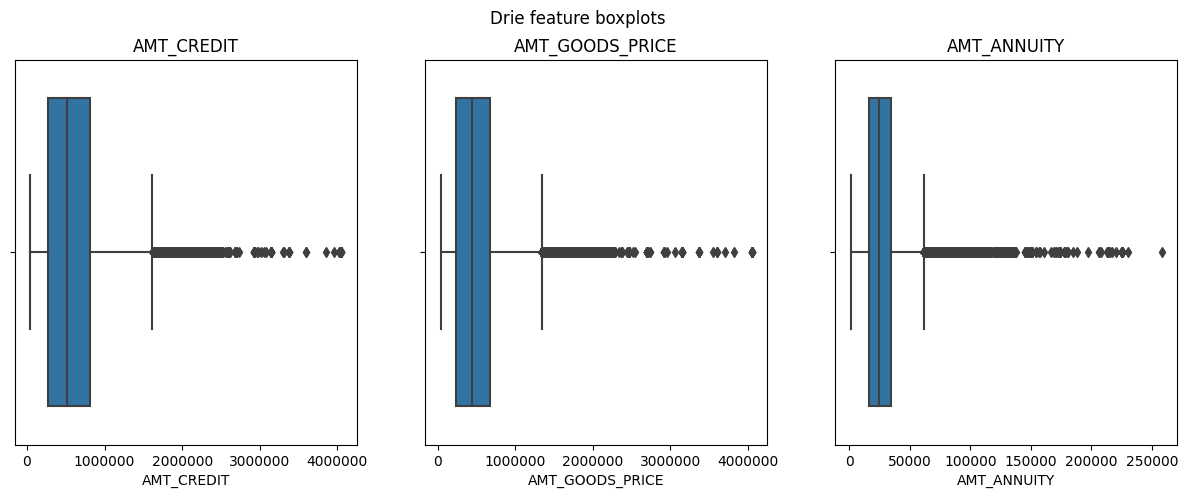

In [7]:
# 'AMT_CREDIT','AMT_GOODS_PRICE','AMT_ANNUITY','AMT_INCOME_TOTAL'

# Maak een figuur met drie subplots naast elkaar
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Eerste boxplot
sns.boxplot(x=app_data['AMT_CREDIT'], ax=axes[0])
axes[0].set_title('AMT_CREDIT')
axes[0].get_xaxis().get_major_formatter().set_scientific(False)

# Tweede boxplot
sns.boxplot(x=app_data['AMT_GOODS_PRICE'], ax=axes[1])
axes[1].set_title('AMT_GOODS_PRICE')
axes[1].get_xaxis().get_major_formatter().set_scientific(False)

# Derde boxplot
sns.boxplot(x=app_data['AMT_ANNUITY'], ax=axes[2])
axes[2].set_title('AMT_ANNUITY')
axes[2].get_xaxis().get_major_formatter().set_scientific(False)

# voegt een titel toe aan de hele figuur
fig.suptitle('Drie feature boxplots')
plt.show()

### We Kunnen dit ook bekijken in een histogram om te kijken hoe features waardes zijn verdeeld

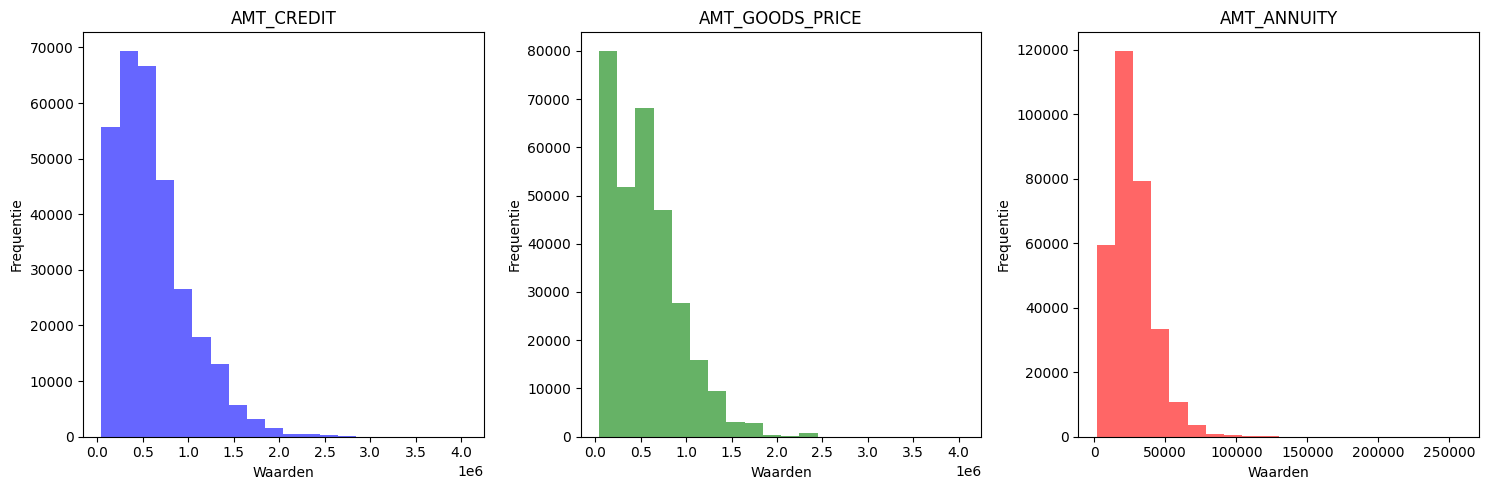

In [8]:
# Maak een figuur met drie subplots naast elkaar
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot het eerste histogram
axes[0].hist(app_data['AMT_CREDIT'], bins=20, color='blue', alpha=0.6)
axes[0].set_xlabel('Waarden')
axes[0].set_ylabel('Frequentie')
axes[0].set_title('AMT_CREDIT')
axes[0].get_xaxis().get_major_formatter().set_scientific(True)

# Plot het tweede histogram
axes[1].hist(app_data['AMT_GOODS_PRICE'], bins=20, color='green', alpha=0.6)
axes[1].set_xlabel('Waarden')
axes[1].set_ylabel('Frequentie')
axes[1].set_title('AMT_GOODS_PRICE')
axes[1].get_xaxis().get_major_formatter().set_scientific(True)

# Plot het derde histogram
axes[2].hist(app_data['AMT_ANNUITY'], bins=20, color='red', alpha=0.6)
axes[2].set_xlabel('Waarden')
axes[2].set_ylabel('Frequentie')
axes[2].set_title('AMT_ANNUITY')
axes[2].get_xaxis().get_major_formatter().set_scientific(True)
# Pas de afstand tussen subplots aan
plt.tight_layout()
plt.show()

#### Als we kijken naar de boxplots en histograms, valt het meteen dat elke Feature zijn eigen uitschieters heeft. Op zich is er een dikke lijn buiten de whiskers te zien. Alleen nu is de vraag willen we die meenemen in ons model ?

#### En is de vraag moeten we die er uit gooien ? Om meer met de centrale data van de dataset te werken ?

een redelijke manier om dit te bepalen is hoe veel data punten dit daadwerkelijk zijn. In vergelijking tot de volledige data set. Dus laten we kijken hoeveel dat zijn.

In [4]:
AMT_CREDIT = len(app_data[app_data['AMT_CREDIT'] > 1800000])

print(f"Aantal waarden groter dan 1.8 miljoen: {AMT_CREDIT}")

AMT_GOODS_PRICE = len(app_data[app_data['AMT_GOODS_PRICE'] > 2000000])

print(f"Aantal waarden groter dan 2 miljoen: {AMT_GOODS_PRICE}")

AMT_ANNUITY = len(app_data[app_data['AMT_ANNUITY'] > 80000])

print(f"Aantal waarden groter dan 80 duizend: {AMT_ANNUITY}")

Total_Length_Data = len(app_data['AMT_CREDIT'])

print(f"Totale aantal rows in dataset: {Total_Length_Data}")

Aantal waarden groter dan 1.8 miljoen: 3279
Aantal waarden groter dan 2 miljoen: 1093
Aantal waarden groter dan 80 duizend: 1523
Totale aantal rows in dataset: 307511


#### Als we kijken naar de resultaten van de 3 simple check. Is dit te overwegen om ze er uit te halen.

In vergelijking met de 300.000 regels aan data is er 3.000 er van afhalen niet een extreem verlies. En dan bestaat er ook de kans dat die niet eens anderen regels weg haalt van AMT_GOODS_PRICE en AMT_ANNUITY. Aangezien de kans groot is dat die in de zelfde regels vallen als de 3.000 regels

##### Of

we vervangen de grote uitschieters door het gemiddelde van de features om zo te voorkomen dat we regels weg gooien

### NOTES NIFFO

3 moddellen gausian mixture. om een dit doen we met de volgende 3 features : AMT_CREDIT,AMT_GOODS_PRICE,AMT_ANNUITY 

boven uitleg over de onderzoeks vraag.

Onderaan een conclusie over de vondsten van de 3 modellen

### We zullen kijken naar de mogelijkheden met de KNN en de GMM

Dit om de 2 modellen met de verschillende features onderling te vergelijken.

In [6]:
# We maken hier alvast de 2 moddelen aan.
# maak een KNN model.
knn = KNeighborsClassifier()

# maak een GMM model
gmm = GaussianMixture()

#### KNN Model voor AMT_CREDIT en AMT_GOODS_PRICE

#### Voordat we een knn kunnen maken moeten we de gegevens normaliseren.

#### Dit is omdat we met een model met afstanden werken, En we willen voorkomen dat bepaalde gegevens meer gewicht gaan hebben in ons model.

#### Hier onder normaliseren we de data

In [26]:
# normalize the AMT_CREDIT and AMT_GOODS_PRICE using the zscore
columns = ['AMT_CREDIT','AMT_GOODS_PRICE']
for col in columns:
    app_data[f'{col}_NORM'] = (app_data[col]-app_data[col].mean())/app_data[col].std()

##### We maken de test train split aan voor de KNN

In [27]:
# assign used values to X and y
X = app_data[['AMT_CREDIT','AMT_GOODS_PRICE']]
y = app_data['TARGET']

# Omdat we te maken hebben met zommige missende waardes zullen we deze vullen met de gemiddeldes om dit te verhelpen.
imputer = SimpleImputer(strategy='mean')

X = imputer.fit_transform(X)

# splits in train en test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# setup possible params
param_grid = {
    'n_neighbors': [n for n in range(1, 31, 3)],  # You can adjust the range as needed
    'weights': ['uniform', 'distance']
}

In [28]:
# create a grid search
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

# get the result from the grid search
best_params = grid_search.best_params_
best_k = best_params['n_neighbors']
best_weight = best_params['weights']
print(f"The best parameters found from the grid search were K = {best_k} and weights = {best_weight}")

The best parameters found from the grid search were K = 16 and weights = uniform


In [29]:
# Set hyper parameters
knn.set_params(n_neighbors = best_k, weights = best_weight)

# Fit het model
knn.fit(X_train,y_train)

# Ons eerste predictie
y_pred = knn.predict(X_test)
print(f"Test: {round(accuracy_score(y_test, y_pred)*100, 2)}%")

# Trainset score
y_train_pred = knn.predict(X_train)
print(f"Train: {round(accuracy_score(y_train, y_train_pred)*100, 2)}%")

Test: 92.08%
Train: 91.88%


##### Nu Doen we de zelfde stappen voor het GMM model

In [33]:
X = app_data[['AMT_CREDIT','AMT_GOODS_PRICE']]
# Omdat we te maken hebben met zommige missende waardes zullen we deze vullen met de gemiddeldes om dit te verhelpen.
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# splits in train en test set
X_train, X_test = train_test_split(X)

param_grid = {
    'n_components': [n for n in range(1, 31, 3)],  # Het aantal componenten (clusters) in het GMM-model
    'covariance_type': ['full', 'tied', 'diag', 'spherical'],  # Het type covariantie
}

In [32]:
# create a grid search
grid_search = GridSearchCV(estimator=gmm, param_grid=param_grid, cv=5)
grid_search.fit(X)

# get the result from the grid search
best_params = grid_search.best_params_
best_n_components = best_params['n_components']
best_covariance_type = best_params['covariance_type']
print(f"The best parameters found from the grid search were Ncomponents = {best_n_components} and covariance = {best_covariance_type}")

C:\Users\daveh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
89 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
38 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\daveh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\mixture\_gaussian_mixture.py", line 329, in _compute_precision_cholesky
    cov_chol = linalg.cholesky(covariance, lower=True)
  File "C:\Users\daveh\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\linalg\_decomp_cholesky.py", line 89, in cholesky
    c, lower = _cholesky(a, lower=lower, overwrite_a=overwrite_a, clean=True,
  File "C:\Users\d

The best parameters found from the grid search were Ncomponents = 28 and covariance = tied


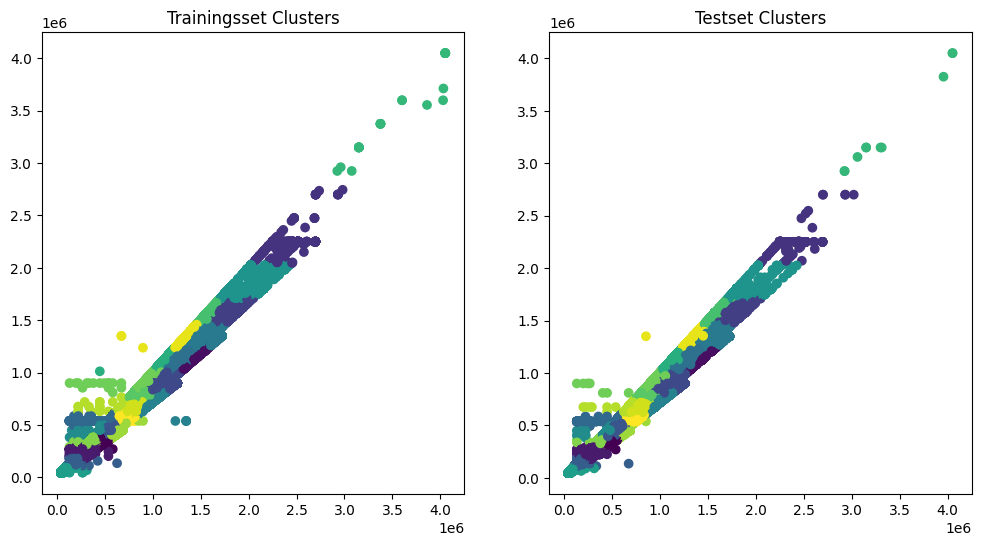

Test: BIC: 4024592.0382968113
Test: AIC: 4023796.5404443396
Train: BIC: 12067233.03997603
Train: AIC: 12066343.06183962


In [37]:
# Set hyper parameters
gmm.set_params(n_components=best_n_components, covariance_type=best_covariance_type, random_state=42)
# We fitte het model met de train data.
gmm.fit(X_train)

# Voer de clustering uit op zowel de trainings- als testset
train_clusters = gmm.predict(X_train)
test_clusters = gmm.predict(X_test)

# Maak een scatterplot voor de trainingsset
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=train_clusters, cmap='viridis')
plt.title('Trainingsset Clusters')

# Maak een scatterplot voor de testset
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=test_clusters, cmap='viridis')
plt.title('Testset Clusters')

plt.show()

print("Test: BIC:", gmm.bic(X_test))
print("Test: AIC:", gmm.aic(X_test))
print("Train: BIC:", gmm.bic(X_train))
print("Train: AIC:", gmm.aic(X_train))

#### Nu gaan we het volgende pakken

#### KNN Model voor AMT_ANNUITY en AMT_GOODS_PRICE

#### Voordat we een knn kunnen maken moeten we de gegevens normaliseren.

#### Dit is omdat we met een model met afstanden werken, En we willen voorkomen dat bepaalde gegevens meer gewicht gaan hebben in ons model.

#### Hier onder normaliseren we de data

In [38]:
# normalize the AMT_CREDIT and AMT_GOODS_PRICE using the zscore
columns = ['AMT_ANNUITY','AMT_GOODS_PRICE']
for col in columns:
    app_data[f'{col}_NORM'] = (app_data[col]-app_data[col].mean())/app_data[col].std()

In [39]:
# assign used values to X and y
X = app_data[['AMT_ANNUITY','AMT_GOODS_PRICE']]
y = app_data['TARGET']

# Omdat we te maken hebben met zommige missende waardes zullen we deze vullen met de gemiddeldes om dit te verhelpen.
imputer = SimpleImputer(strategy='mean')

X = imputer.fit_transform(X)

# splits in train en test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# setup possible params
param_grid = {
    'n_neighbors': [n for n in range(1, 31, 3)],  # You can adjust the range as needed
    'weights': ['uniform', 'distance']
}

In [40]:
# create a grid search
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

# get the result from the grid search
best_params = grid_search.best_params_
best_k = best_params['n_neighbors']
best_weight = best_params['weights']
print(f"The best parameters found from the grid search were K = {best_k} and weights = {best_weight}")

The best parameters found from the grid search were K = 22 and weights = uniform


In [41]:
# Set hyper parameters
knn.set_params(n_neighbors = best_k, weights = best_weight)

# Fit het model
knn.fit(X_train,y_train)

# Ons eerste predictie
y_pred = knn.predict(X_test)
print(f"Test: {round(accuracy_score(y_test, y_pred)*100, 2)}%")

# Trainset score
y_train_pred = knn.predict(X_train)
print(f"Train: {round(accuracy_score(y_train, y_train_pred)*100, 2)}%")

Test: 92.07%
Train: 91.88%


#### Nu Doen we de zelfde stappen voor het GMM model

In [45]:
X = app_data[['AMT_ANNUITY','AMT_GOODS_PRICE']]
# Omdat we te maken hebben met zommige missende waardes zullen we deze vullen met de gemiddeldes om dit te verhelpen.
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# splits in train en test set
X_train, X_test = train_test_split(X)

param_grid = {
    'n_components': [n for n in range(1, 31, 3)],  # Het aantal componenten (clusters) in het GMM-model
    'covariance_type': ['full', 'tied'],  # Het type covariantie
}

In [47]:
# create a grid search
grid_search = GridSearchCV(estimator=gmm, param_grid=param_grid, cv=5)
grid_search.fit(X)

# get the result from the grid search
best_params = grid_search.best_params_
best_n_components = best_params['n_components']
best_covariance_type = best_params['covariance_type']
print(f"The best parameters found from the grid search were Ncomponents = {best_n_components} and covariance = {best_covariance_type}")

C:\Users\daveh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\mixture\_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
C:\Users\daveh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\mixture\_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


The best parameters found from the grid search were Ncomponents = 28 and covariance = full


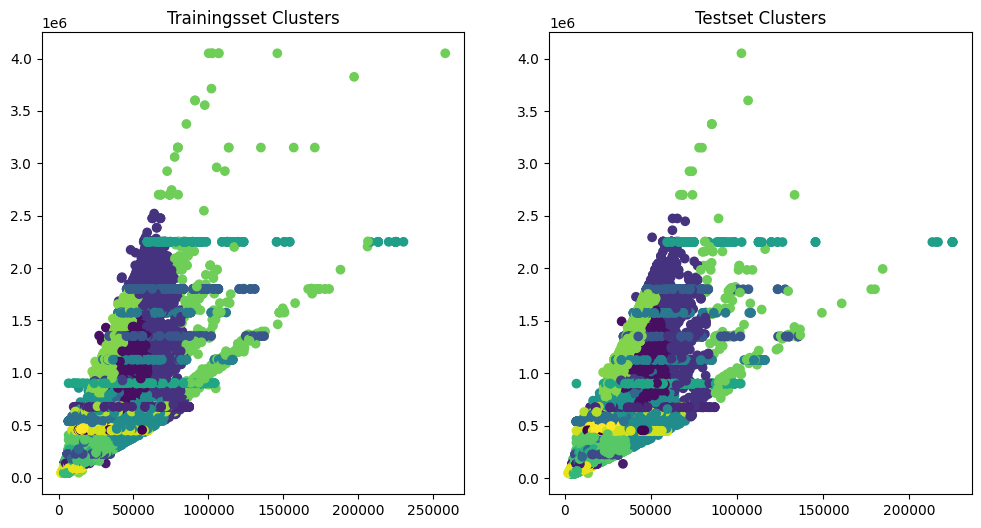

Test: BIC: 2477983.485989566
Test: AIC: 2476438.7401597667
Train: BIC: 7447974.214053477
Train: AIC: 7446246.000695563


In [48]:
# Set hyper parameters
gmm.set_params(n_components=best_n_components, covariance_type=best_covariance_type, random_state=42)
# We fitte het model met de train data.
gmm.fit(X_train)

# Voer de clustering uit op zowel de trainings- als testset
train_clusters = gmm.predict(X_train)
test_clusters = gmm.predict(X_test)

# Maak een scatterplot voor de trainingsset
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=train_clusters, cmap='viridis')
plt.title('Trainingsset Clusters')

# Maak een scatterplot voor de testset
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=test_clusters, cmap='viridis')
plt.title('Testset Clusters')

plt.show()

print("Test: BIC:", gmm.bic(X_test))
print("Test: AIC:", gmm.aic(X_test))
print("Train: BIC:", gmm.bic(X_train))
print("Train: AIC:", gmm.aic(X_train))

## Conclusie onderzoeks vraag 3.

Herhaling Vraag : 
In hoeverre is het mogelijk om logische clusters van consumenten (bijv. AMT_INCOME_TOTAL, DAYS_EMPLOYED, CNT_FAM_MEMBERS) en hun leningen te vinden (bijv. AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE)? Denk aan consumenten met (te)veel, weinig of geen leningen.